## Tiền xử lý dữ liệu

In [1]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('Simplize_MWG_PriceHistory_20250315.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-15,42535.966299,43444.438500,42373.739120,43055.093271,NaN,NaN,766800
2021-03-16,43055.093271,43314.656757,42698.193478,43217.320450,NaN,NaN,700800
2021-03-17,43314.656757,43314.656757,43087.538707,43087.538707,NaN,NaN,570323
2021-03-18,43314.656757,43411.993065,40556.794717,43347.102193,NaN,NaN,914000
2021-03-19,43152.429579,43314.656757,42827.975221,43152.429579,NaN,NaN,376700


In [3]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('Simplize_MWG_FinancialIndicator_20250315.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,6.586969e+12,8.470044e+11,30.263557,579.550827,8.3892,0.1450,1.4970,1.668016,0.504292,18992.717131
Q3/2024,6.891911e+12,8.001500e+11,44.281150,547.329884,19.6616,0.1176,1.4527,1.688351,0.514374,18411.361560
Q2/2024,7.307714e+12,1.172277e+12,83.091594,801.877401,66.3800,0.0887,1.4878,1.672117,0.527520,17868.496592
Q1/2024,6.712616e+12,9.024372e+11,403.824706,617.159009,41.4560,0.0420,1.4408,1.694071,0.509278,17289.100643
Q4/2023,6.186461e+12,9.025756e+10,88.095576,61.725366,-0.8541,0.0071,1.5732,1.635663,0.529192,15965.977026


In [4]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [5]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,59570.000000,2024-12-31
Q3/2024,66761.904762,2024-09-30
Q2/2024,63952.405363,2024-06-30
Q1/2024,49642.882492,2024-03-31
Q4/2023,42133.496596,2023-12-31


In [6]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,7.024946e+12,1.337969e+12,15.467009,2814.935943,0.1265,0.2721,1.9425,1.514804,0.642088,35647.391087,43008.742649,NaN,NaN
Q2/2021,7.143583e+12,1.213030e+12,16.161964,1701.528799,-0.1385,0.2733,1.9539,1.511784,0.609863,25597.105838,50171.458851,7162.716202,0.166541
Q3/2021,6.088713e+12,7.853854e+11,18.077447,1101.779598,-0.4597,0.2516,1.6653,1.600487,0.467662,26368.369155,62373.580543,12202.121692,0.243208
Q4/2021,7.374890e+12,1.562486e+12,22.243863,2134.471809,0.0775,0.2734,2.0907,1.478311,0.638992,27822.031837,65829.093642,3455.513099,0.055400
Q1/2022,8.124264e+12,1.444465e+12,19.498313,986.852347,-0.6494,0.2584,1.8597,1.537724,0.581820,14892.074928,71259.932847,5430.839205,0.082499


## Phân tích dữ liệu

In [7]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,7.024946e+12,1.337969e+12,15.467009,2814.935943,0.1265,0.2721,1.9425,1.514804,0.642088,35647.391087,43008.742649,NaN,NaN
Q2/2021,7.143583e+12,1.213030e+12,16.161964,1701.528799,-0.1385,0.2733,1.9539,1.511784,0.609863,25597.105838,50171.458851,7162.716202,0.166541
Q3/2021,6.088713e+12,7.853854e+11,18.077447,1101.779598,-0.4597,0.2516,1.6653,1.600487,0.467662,26368.369155,62373.580543,12202.121692,0.243208
Q4/2021,7.374890e+12,1.562486e+12,22.243863,2134.471809,0.0775,0.2734,2.0907,1.478311,0.638992,27822.031837,65829.093642,3455.513099,0.055400
Q1/2022,8.124264e+12,1.444465e+12,19.498313,986.852347,-0.6494,0.2584,1.8597,1.537724,0.581820,14892.074928,71259.932847,5430.839205,0.082499


### Thống kê mô tả

In [8]:
print(df_final.describe().to_markdown(floatfmt=",.2f"))

|       |         gross_profit |           net_income |     pe |      eps |   eps_growth |   roe |   de_ratio |   current_ratio |   asset_turnover |   book_value |   close_avg |   price_change |   pct_change |
|:------|---------------------:|---------------------:|-------:|---------:|-------------:|------:|-----------:|----------------:|-----------------:|-------------:|------------:|---------------:|-------------:|
| count |                16.00 |                16.00 |  16.00 |    16.00 |        16.00 | 16.00 |      16.00 |           16.00 |            16.00 |        16.00 |       16.00 |          15.00 |        15.00 |
| mean  | 6,777,135,662,759.12 |   805,510,633,743.12 |  55.09 |   825.91 |         8.08 |  0.16 |       1.62 |            1.63 |             0.54 |    19,660.07 |   55,089.62 |       1,104.08 |         0.04 |
| std   |   855,496,606,272.99 |   520,436,817,467.03 |  95.88 |   794.63 |        19.22 |  0.10 |       0.23 |            0.09 |             0.05 |     5,960.8

In [9]:
print(df_final.var().to_frame(name='Variance').to_markdown(floatfmt=",.2f"))

|                |                           Variance |
|:---------------|-----------------------------------:|
| gross_profit   | 731,874,443,344,595,531,071,488.00 |
| net_income     | 270,854,480,975,206,104,956,928.00 |
| pe             |                           9,193.69 |
| eps            |                         631,441.57 |
| eps_growth     |                             369.52 |
| roe            |                               0.01 |
| de_ratio       |                               0.05 |
| current_ratio  |                               0.01 |
| asset_turnover |                               0.00 |
| book_value     |                      35,531,719.82 |
| close_avg      |                     121,793,402.88 |
| price_change   |                      80,861,001.86 |
| pct_change     |                               0.03 |


### Vẽ biểu đồ biến động 

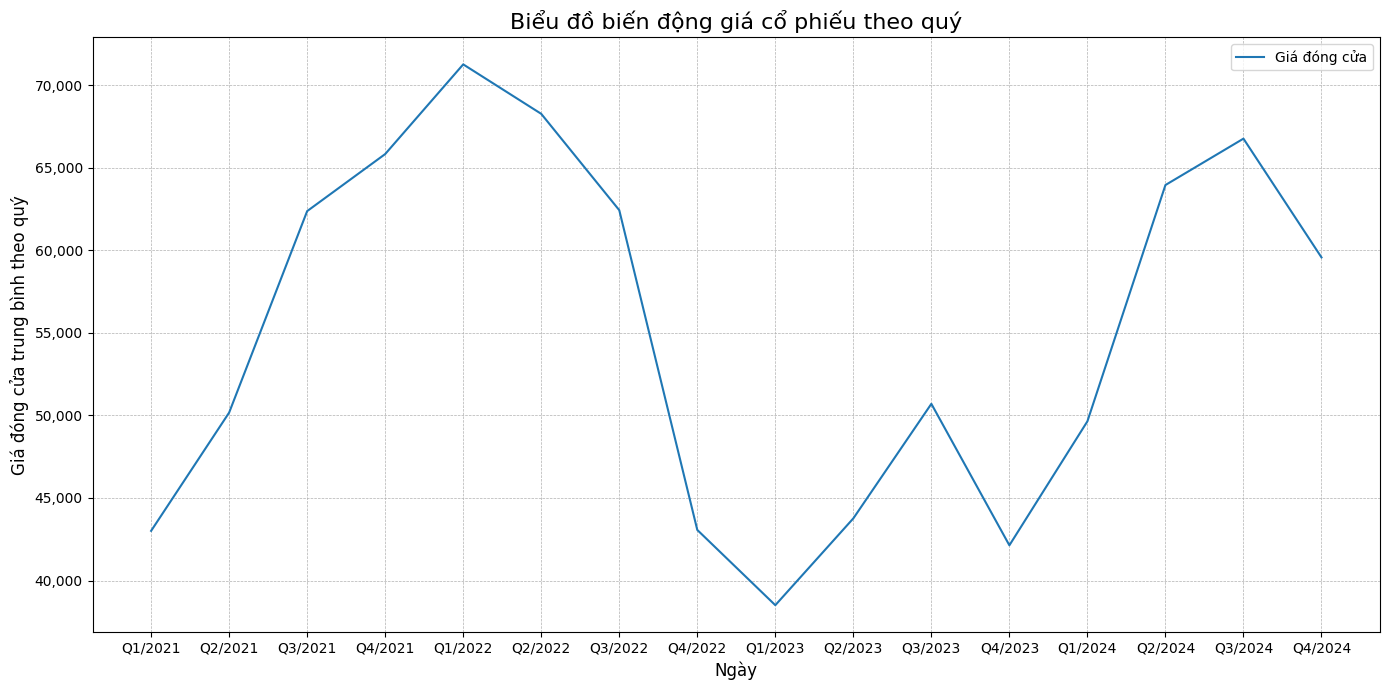

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

### Tương quan giữa các chỉ số tài chính

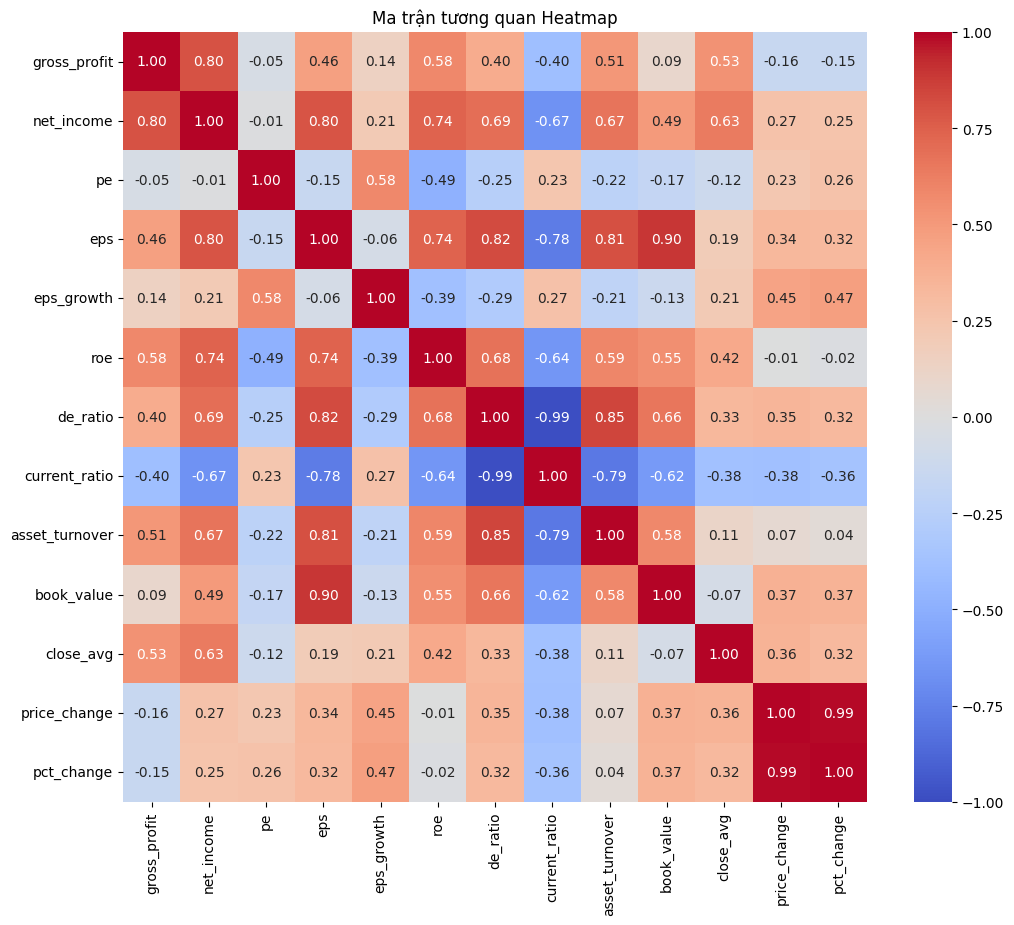

In [11]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [12]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
net_income        0.633083
gross_profit      0.532933
roe               0.415490
price_change      0.362708
de_ratio          0.328135
pct_change        0.323719
eps_growth        0.206690
eps               0.194607
asset_turnover    0.112457
book_value       -0.067481
pe               -0.124503
current_ratio    -0.377906
Name: close_avg, dtype: float64

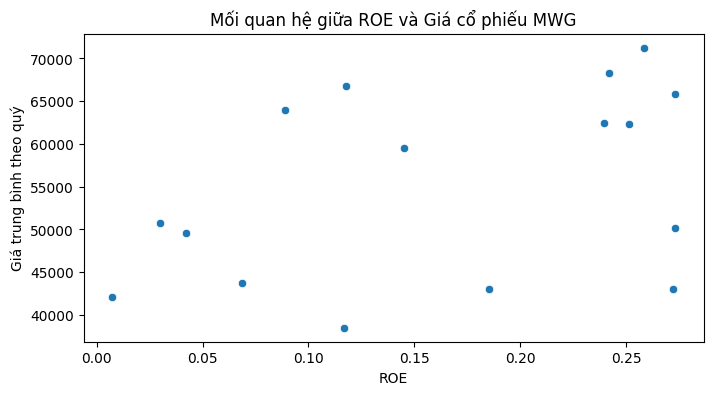

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu MWG')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()